# WIDS Datathon 2024 (Guadalajara)

Welcome to our exciting event! This datathon is the perfect platform for programmers eager to learn, grow, and showcase their skills. Our primary objective is to assist you in exploring whether there are unequal treatments in various domains and comprehending the factors that drive these biases, including demographics and societal influences. By participating in this event, you will gain valuable insights and the opportunity to share your knowledge and contribute to a more inclusive and equitable world. So join us in this immersive experience, and let’s make a difference together!

**Event Type**
Datathon Workshop

**Date**
February 15, 2024

**Time**
7:00 pm - 11:00 pm (CST)

**Event Type**
Online

**Language**
Spanish

Objetivo: Integrar a las programadores en la fuerza laboral. Se busca que 30% de las mujeres estén inmersas en el área de la programación y Data Science.

Los datos tratan de metástasis en cáncer de mama. Si no hay un diagnóstico antes de 90 días.

Los datos, su contexto, y objetivo, se mencionan en la página de [Kaggle](https://www.kaggle.com/competitions/widsdatathon2024-challenge1/data):

# Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(30,30)})
import os

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 100) # so more rows are showed in terminal

%matplotlib inline

# Import data

In [ ]:
# Data import (train.csv to make and evaluate model, and test.csv to submit probability file)
df_tr = pd.read_csv('Datasets/training.csv')
df_ts = pd.read_csv('Datasets/test.csv')
df_tr.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
print(df_tr.shape)
print(df_ts.shape)
# tenemos 83 variables

(12906, 83)
(5792, 82)


We have one less variable (**DiagPeriodL90D**) in test.csv, so that we can only generate predictions but not evaluate the model.
The same data treatment has to be made for both DataFrames.

In [ ]:
# Data information
# To observe if the variables are numeric or categorical
# Null values are presented as well

df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

## Null Values

In [ ]:
# We make a new DataFrame with the number of null values per column
df_tr.isna().sum().to_frame().head(83)

,0
patient_id,0
patient_race,6385
payer_type,1803
patient_state,51
patient_zip3,0
patient_age,0
patient_gender,0
bmi,8965
breast_cancer_diagnosis_code,0
breast_cancer_diagnosis_desc,0


Two variables, **metastatic_first_novel_treatment** and **metastatic_first_novel_treatment_type**, have a lot of Nan values. We check the distribution per category (target) to see if they could be relevant.

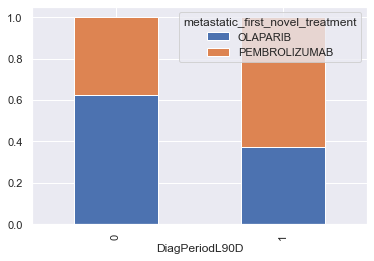

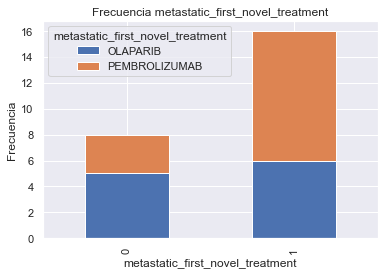

In [ ]:
# metastatic_first_novel_treatment per categorización DiagPeriodL90D
table = pd.crosstab(df_tr.DiagPeriodL90D, df_tr.metastatic_first_novel_treatment)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
table.plot(kind='bar', stacked = True)
plt.title('Frecuencia metastatic_first_novel_treatment')
plt.ylabel('Frecuencia')
plt.xlabel('metastatic_first_novel_treatment')
plt.show()

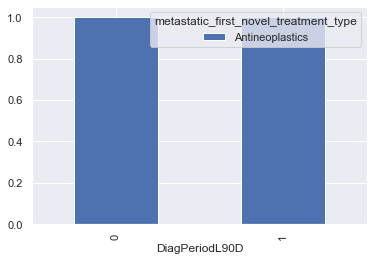

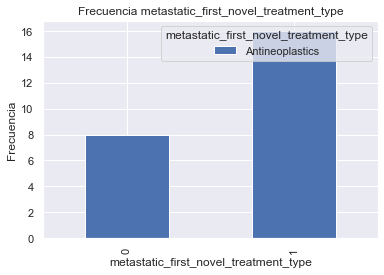

In [ ]:
# metastatic_first_novel_treatment per categorización DiagPeriodL90D
table = pd.crosstab(df_tr.DiagPeriodL90D, df_tr.metastatic_first_novel_treatment_type)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
table.plot(kind='bar', stacked = True)
plt.title('Frecuencia metastatic_first_novel_treatment_type')
plt.ylabel('Frecuencia')
plt.xlabel('metastatic_first_novel_treatment_type')
plt.show()

The sample number of these variables is not high, although the proportions in **metastatic_first_novel_treatment** shows that it could be relevant. We decide not to include them.

In [ ]:
list_drop = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_id']
df_tr_2 = df_tr.drop(list_drop, axis=1)
df_ts_2 = df_ts.drop(list_drop, axis=1)

The next problematic variable is **patient_race**. It could be relevant, we could replace the Nan values for an additional category _not_specified_.

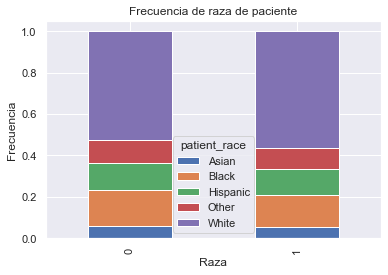

In [ ]:
# patient_race per category DiagPeriodL90D
table = pd.crosstab(df_tr_2.DiagPeriodL90D, df_tr_2.patient_race)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Frecuencia de raza de paciente')
plt.ylabel('Frecuencia')
plt.xlabel('Raza')
plt.show()

The proportion of races in each diag90 category seems to be very similar.

In [ ]:
df_tr_3 = df_tr_2.copy()
df_ts_3 = df_ts_2.copy()

df_tr_3['patient_race'] = df_tr_2['patient_race'].fillna('not_specified')
df_ts_3['patient_race'] = df_ts_2['patient_race'].fillna('not_specified')

#df_tr_3 = df_tr_2.drop('patient_race', axis=1)
#df_ts_3 = df_ts_2.drop('patient_race', axis=1)


The next problematic variable is **bmi**. Thinking it could be relevant to include this information in the model, we decide to categorize this numerical variable. Null values are replace as _not specified_.

* bmi < 18.5 $\rightarrow$ underweight
* 18.5 < bmi < 25.0 $\rightarrow$ healthy weight
* 25.0 < bmi < 30.0 $\rightarrow$ overweigh
* 30.0 < bmi $\rightarrow$ obesity

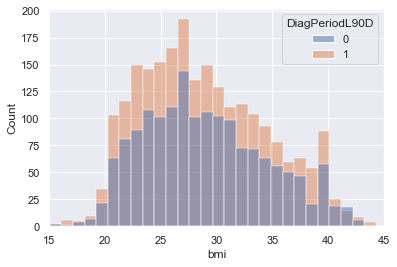

In [ ]:
# BMI histogram

sns.histplot(data=df_tr_3,
             x='bmi',
             hue='DiagPeriodL90D')
plt.xlim(15,45)

plt.show()

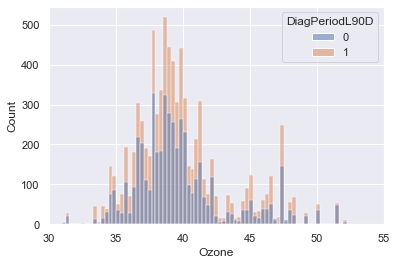

In [ ]:
# We check another numeric variable
sns.histplot(data=df_tr_3,
             x='Ozone',
             hue='DiagPeriodL90D')
plt.xlim(30,55)

plt.show()

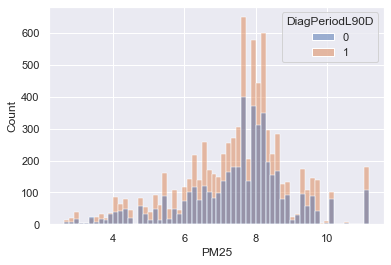

In [ ]:
sns.histplot(data=df_tr_3,
             x='PM25',
             hue='DiagPeriodL90D')

plt.show()

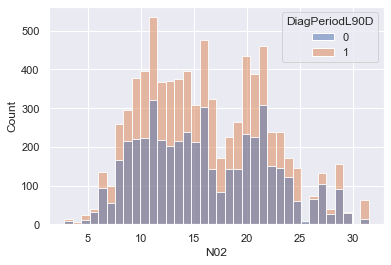

In [ ]:
sns.histplot(data=df_tr_3,
             x='N02',
             hue='DiagPeriodL90D')

plt.show()

In the same way, the distribution of **bmi** could suggest that is not relevant to make a quick diagnose. We categorize this variable.

In [ ]:
df_tr_4 = df_tr_3.copy()
df_ts_4 = df_ts_3.copy()

#df_tr_4['bmi'] = df_tr_3['bmi'].fillna(df_tr_3['bmi'].mean())
#df_ts_4['bmi'] = df_ts_3['bmi'].fillna(df_ts_3['bmi'].mean())

#df_tr_4 = df_tr_3.drop('bmi', axis=1)
#df_ts_4 = df_ts_3.drop('bmi', axis=1)

df_tr_4['bmi_underweight'] = np.where(df_tr_4['bmi']<18.5,1,0) # condition, if true, if false
df_tr_4['bmi_healthy'] = np.where((df_tr_4['bmi']>=18.5) & (df_tr_4['bmi']<25.0),1,0)
df_tr_4['bmi_overweight'] = np.where((df_tr_4['bmi']>=25.0) & (df_tr_4['bmi']<30.0),1,0)
df_tr_4['bmi_obese'] = np.where(30.0<=df_tr_4['bmi'],1,0)
df_tr_4['bmi_not_specified'] = np.where(df_tr_4['bmi'].isna(),1,0)
df_tr_4 = df_tr_4.drop('bmi', axis=1) # drop the original variable

df_ts_4['bmi_underweight'] = np.where(df_ts_4['bmi']<18.5,1,0)
df_ts_4['bmi_healthy'] = np.where((df_ts_4['bmi']>=18.5) & (df_ts_4['bmi']<25.0),1,0)
df_ts_4['bmi_overweight'] = np.where((df_ts_4['bmi']>=25.0) & (df_ts_4['bmi']<30.0),1,0)
df_ts_4['bmi_obese'] = np.where(30.0<=df_ts_4['bmi'],1,0)
df_ts_4['bmi_not_specified'] = np.where(df_ts_4['bmi'].isna(),1,0)
df_ts_4 = df_ts_4.drop('bmi', axis=1)

In [ ]:
df_tr_4.isna().sum().to_frame().head(90)

,0
patient_race,0
payer_type,1803
patient_state,51
patient_zip3,0
patient_age,0
patient_gender,0
breast_cancer_diagnosis_code,0
breast_cancer_diagnosis_desc,0
metastatic_cancer_diagnosis_code,0
Region,52


For the next variables, since they are not so many, we decide to fill the null values. But only based on file **test.csv**.

In [ ]:
# List of variables with nan values (in the test.csv)

df_null = df_ts_4.isna().any(axis=0).to_frame()
null_list = df_null[df_null[0]==True].index.values.tolist()
null_list

['payer_type',
 'patient_state',
 'Region',
 'Division',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'home_value',
 'rent_median',
 'rent_burden',
 'self_employed',
 'farmer',
 'poverty',
 'limited_english',
 'Ozone',
 'PM25',
 'N02']

In [ ]:
df_tr_5 = df_tr_4.copy()
df_ts_5 = df_ts_4.copy()

null_categoric = ['payer_type',
 'patient_state',
 'Region',
 'Division']

null_numeric = ['family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'home_value',
 'rent_median',
 'rent_burden',
 'self_employed',
 'farmer',
 'poverty',
 'limited_english',
 'Ozone',
 'PM25',
 'N02']



#Fill values of categoric variables with 'not_specified' category
for element in null_categoric:
    df_tr_5[element] = df_tr_5[element].fillna('not_specified')
    df_ts_5[element] = df_ts_5[element].fillna('not_specified')


#Fill values of numeric variables with their column mean (they're not that many null values)
for element in null_numeric:
    df_tr_5[element] = df_tr_5[element].fillna(df_tr_5[element].mean())
    df_ts_5[element] = df_ts_5[element].fillna(df_ts_5[element].mean())
    #minmax scale



In [ ]:
#train dataset
df_tr_5.isna().sum().to_frame().head(90)

,0
patient_race,0
payer_type,0
patient_state,0
patient_zip3,0
patient_age,0
patient_gender,0
breast_cancer_diagnosis_code,0
breast_cancer_diagnosis_desc,0
metastatic_cancer_diagnosis_code,0
Region,0


In [ ]:
# test dataset
df_ts_5.isna().sum().to_frame().head(90)

,0
patient_race,0
payer_type,0
patient_state,0
patient_zip3,0
patient_age,0
patient_gender,0
breast_cancer_diagnosis_code,0
breast_cancer_diagnosis_desc,0
metastatic_cancer_diagnosis_code,0
Region,0


The test submission variables have no null values. We can drop the remaining ones for the train one.

In [ ]:
df_tr_5 = df_tr_5.dropna()
df_ts_5 = df_ts_5.dropna()

In [ ]:
print('BEFORE')
print('##Train dataset##')
print('Number of rows=',df_tr.shape[0])
print('Number of columns=',df_tr.shape[1])
print('##Test dataset##')
print('Number of rows=',df_ts.shape[0])
print('Number of columns=',df_ts.shape[1])

print('AFTER')
print('##Train dataset##')
print('Number of rows=',df_tr_5.shape[0])
print('Number of columns=',df_tr_5.shape[1])
print('##Test dataset##')
print('Number of rows=',df_ts_5.shape[0])
print('Number of columns=',df_ts_5.shape[1])

BEFORE
##Train dataset##
Number of rows= 12906
Number of columns= 83
##Test dataset##
Number of rows= 5792
Number of columns= 82
AFTER
##Train dataset##
Number of rows= 12905
Number of columns= 84
##Test dataset##
Number of rows= 5792
Number of columns= 83


We only loose one row in the train dataset doing this.

## Categoric to boolean

In [ ]:
# list of categorical values

categorical = df_tr_5.select_dtypes(include=['object']).columns.tolist()
categorical

['patient_race',
 'payer_type',
 'patient_state',
 'patient_gender',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'Region',
 'Division']

In [ ]:
# We make dummy variables with pandas

df_tr_6 = df_tr_5.copy()
df_ts_6 = df_ts_5.copy()


for element in categorical:
    tab_dummy = pd.get_dummies(df_tr_6[element],prefix=element)
    data_new = df_tr_6.join(tab_dummy)
    df_tr_6 = data_new

for element in categorical:
    tab_dummy = pd.get_dummies(df_ts_6[element],prefix=element)
    data_new = df_ts_6.join(tab_dummy)
    df_ts_6 = data_new

In [ ]:
for category in categorical:
    print(category, df_tr_6[category].unique(), len(df_tr_6[category].unique()))
    print(category, df_ts_6[category].unique(), len(df_ts_6[category].unique()))

patient_race ['not_specified' 'White' 'Other' 'Hispanic' 'Asian' 'Black'] 6
patient_race ['White' 'not_specified' 'Hispanic' 'Black' 'Asian' 'Other'] 6
payer_type ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' 'not_specified'] 4
payer_type ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' 'not_specified'] 4
patient_state ['CA' 'TX' 'ID' 'NY' 'IL' 'not_specified' 'MI' 'OR' 'MT' 'KY' 'OH' 'IN'
 'FL' 'CO' 'GA' 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC'
 'LA' 'IA' 'TN' 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND'
 'OK' 'WY' 'DE' 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA'] 51
patient_state ['IN' 'FL' 'CA' 'MI' 'TX' 'AZ' 'CO' 'KY' 'IL' 'NY' 'IA' 'PA' 'WI' 'OH'
 'TN' 'OK' 'MN' 'GA' 'LA' 'ID' 'MD' 'MO' 'NV' 'VA' 'MS' 'WA' 'MT' 'NC'
 'OR' 'NJ' 'DC' 'NM' 'HI' 'SC' 'AR' 'KS' 'AL' 'NE' 'DE' 'UT'
 'not_specified' 'SD' 'WV' 'ND' 'MA' 'AK' 'WY'] 47
patient_gender ['F'] 1
patient_gender ['F'] 1
breast_cancer_diagnosis_code ['C50919' 'C50411' 'C50112' 'C50212' '1749' 'C50912' 'C50512' '17

So there is a problem. Some categories appear on the test set that do not appear in the train set. And apparently, each of the **breast_cancer_diagnosis_code** corresponds to a description. So we could ignore the description column altogether.
The problems are the codes and the states.

In [ ]:
# We drop the diagnosis description
df_tr_6 = df_tr_5.copy()
df_ts_6 = df_ts_5.copy()

df_tr_6 = df_tr_6.drop('breast_cancer_diagnosis_desc', axis=1)
df_ts_6 = df_ts_6.drop('breast_cancer_diagnosis_desc', axis=1)

# unique list of states
list_tr = list(df_tr_6['patient_state'].unique())
list_ts = list(df_ts_6['patient_state'].unique())
list_tot = list_tr + list_ts
state_list = [] # total unique state list between data sets
for x in list_tot:
    if x not in state_list:
        state_list.append(x)
print('number of unique states =', np.array(state_list).shape)

# unique list of breast cancer diagnosis codes
list_tr = list(df_tr_6['breast_cancer_diagnosis_code'].unique())
list_ts = list(df_ts_6['breast_cancer_diagnosis_code'].unique())
list_tot = list_tr + list_ts
bc_list = [] # total unique breast cancer code list between data sets
for x in list_tot:
    if x not in bc_list:
        bc_list.append(x)
print('number of unique breast cancer diagnosis codes =', np.array(bc_list).shape)

# unique list of metastatic cancer diagnosis codes
list_tr = list(df_tr_6['metastatic_cancer_diagnosis_code'].unique())
list_ts = list(df_ts_6['metastatic_cancer_diagnosis_code'].unique())
list_tot = list_tr + list_ts
mc_list = [] # total unique metastatic cancer code list between data sets
for x in list_tot:
    if x not in mc_list:
        mc_list.append(x)
print('number of unique metastatic cancer diagnosis codes =', np.array(mc_list).shape)

# We create binary variables for these lists

#patient_state
for element in state_list:
    df_tr_6['patient_state_'+element] = np.where(df_tr_6['patient_state']==element,1,0)
    df_ts_6['patient_state_'+element] = np.where(df_ts_6['patient_state']==element,1,0)
df_tr_6 = df_tr_6.drop('patient_state', axis = 1)
df_ts_6 = df_ts_6.drop('patient_state', axis = 1)

#breast cancer code
for element in bc_list:
    df_tr_6['breast_cancer_diagnosis_code_'+element] = np.where(df_tr_6['breast_cancer_diagnosis_code']==element,1,0)
    df_ts_6['breast_cancer_diagnosis_code_'+element] = np.where(df_ts_6['breast_cancer_diagnosis_code']==element,1,0)
df_tr_6 = df_tr_6.drop('breast_cancer_diagnosis_code', axis = 1)
df_ts_6 = df_ts_6.drop('breast_cancer_diagnosis_code', axis = 1)

#metastatic cancer code
for element in mc_list:
    df_tr_6['metastatic_cancer_diagnosis_code_'+element] = np.where(df_tr_6['metastatic_cancer_diagnosis_code']==element,1,0)
    df_ts_6['metastatic_cancer_diagnosis_code_'+element] = np.where(df_ts_6['metastatic_cancer_diagnosis_code']==element,1,0)
df_tr_6 = df_tr_6.drop('metastatic_cancer_diagnosis_code', axis = 1)
df_ts_6 = df_ts_6.drop('metastatic_cancer_diagnosis_code', axis = 1)

# We make dummy variables as before
categorical=['patient_race',
 'payer_type',
 'patient_gender',
 'Region',
 'Division']

for element in categorical:
    tab_dummy = pd.get_dummies(df_tr_6[element],prefix=element)
    data_new = df_tr_6.join(tab_dummy)
    df_tr_6 = data_new

for element in categorical:
    tab_dummy = pd.get_dummies(df_ts_6[element],prefix=element)
    data_new = df_ts_6.join(tab_dummy)
    df_ts_6 = data_new

number of unique states = (51,)
number of unique breast cancer diagnosis codes = (52,)
number of unique metastatic cancer diagnosis codes = (43,)


In [ ]:
df_tr_6.shape

(12905, 252)

In [ ]:
df_ts_6.shape

(5792, 251)

We drop the remaining categoric variables, no longer necessary.

In [ ]:
to_keep = [element for element in df_tr_6.columns if element not in categorical]
df_tr_7 = df_tr_6[to_keep]
to_keep.remove('DiagPeriodL90D')
df_ts_7 = df_ts_6[to_keep]

In [ ]:
print(df_tr_6.shape)
print(df_ts_6.shape)

(12905, 252)
(5792, 251)


This is the **clean dataset**. We make tests with the _train_ dataset.

In [ ]:
# We keep predictor features in X
# We keep the target variable in Y

to_keep = [element for element in df_tr_6.columns if element not in categorical]
X = to_keep.copy()
X.remove('DiagPeriodL90D')
Y='DiagPeriodL90D'

## Patient age categorization
The age in both datasets has a maximum value of 91 and a minumum of 18

In [ ]:
#df_tr_8 = df_tr_7.copy()
#df_ts_8 = df_ts_7.copy()

#feature = 'patient_age'

#bin_number =  12 # number of categories
#age_max = df_tr_8[feature].max()
#age_min = df_tr_8[feature].min()

#bin_array = np.arange(age_min-1,age_max+(bin_number/2),(age_max - age_min) / bin_number)
#bin_array = [int(element) for element in bin_array]
#print('bins=',bin_array)

#for i in range(0,len(bin_array)-1):
#    df_tr_8[feature + '_' + str(bin_array[i]) + '_' + str(bin_array[i+1])] = \
#    np.where((df_tr_8[feature]>=bin_array[i]) & (df_tr_8[feature]<bin_array[i+1]),1,0)
#    df_ts_8[feature + '_' + str(bin_array[i]) + '_' + str(bin_array[i+1])] = \
#    np.where((df_ts_8[feature]>=bin_array[i]) & (df_ts_8[feature]<bin_array[i+1]),1,0)

In [ ]:
df_tr_8 = df_tr_7.copy()
df_ts_8 = df_ts_7.copy()


df_tr_8['age_junior'] = np.where((df_tr_8['patient_age']>=18) & (df_tr_8['patient_age']<30.0),1,0)
df_tr_8['age_young'] = np.where((df_tr_8['patient_age']>=30) & (df_tr_8['patient_age']<45.0),1,0)
df_tr_8['age_adult'] = np.where((df_tr_8['patient_age']>=45) & (df_tr_8['patient_age']<60.0),1,0)
df_tr_8['age_senior'] = np.where((df_tr_8['patient_age']>=60) & (df_tr_8['patient_age']<75.0),1,0)
df_tr_8['age_old'] = np.where((df_tr_8['patient_age']>=75) & (df_tr_8['patient_age']<100.0),1,0)

df_tr_8 = df_tr_8.drop('patient_age', axis=1) # drop the original variable

df_ts_8['age_junior'] = np.where((df_ts_8['patient_age']>=18) & (df_ts_8['patient_age']<30.0),1,0)
df_ts_8['age_adult'] = np.where((df_ts_8['patient_age']>=45) & (df_ts_8['patient_age']<60.0),1,0)
df_ts_8['age_senior'] = np.where((df_ts_8['patient_age']>=60) & (df_ts_8['patient_age']<75.0),1,0)
df_ts_8['age_old'] = np.where((df_ts_8['patient_age']>=75) & (df_ts_8['patient_age']<100.0),1,0)

df_ts_8 = df_ts_8.drop('patient_age', axis=1) # drop the original variable


In [ ]:
## TEST########
#df_tr_8 = df_tr_7.copy()
#df_ts_8 = df_ts_7.copy()

In [ ]:
# List of features and target

X = list(df_tr_8.columns)
X.remove('DiagPeriodL90D')
Y='DiagPeriodL90D'

In [ ]:
#pd.crosstab(df_tr_5['breast_cancer_diagnosis_code'],df_tr_5['breast_cancer_diagnosis_desc']).to_csv('codes.csv')

In [ ]:
# numeric list
numeric_list = df_tr_8.select_dtypes(include=['float']).columns.tolist()
scaler = MinMaxScaler()
for element in numeric_list:
    df_tr_8[element] = scaler.fit_transform(df_tr_8)
    df_ts_8[element] = scaler.fit_transform(df_ts_8)

## Feature selection (pro)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings

In [ ]:
estimator = LogisticRegression(random_state=15,
                               max_iter=5000)
rfecv = RFECV(estimator=estimator,
              cv=StratifiedKFold(10, random_state=17, shuffle=True),
              scoring="accuracy")
rfecv.fit(df_tr_8[X], df_tr_8[Y])

RFECV(cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
      estimator=LogisticRegression(max_iter=5000, random_state=15),
      scoring='accuracy')

/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


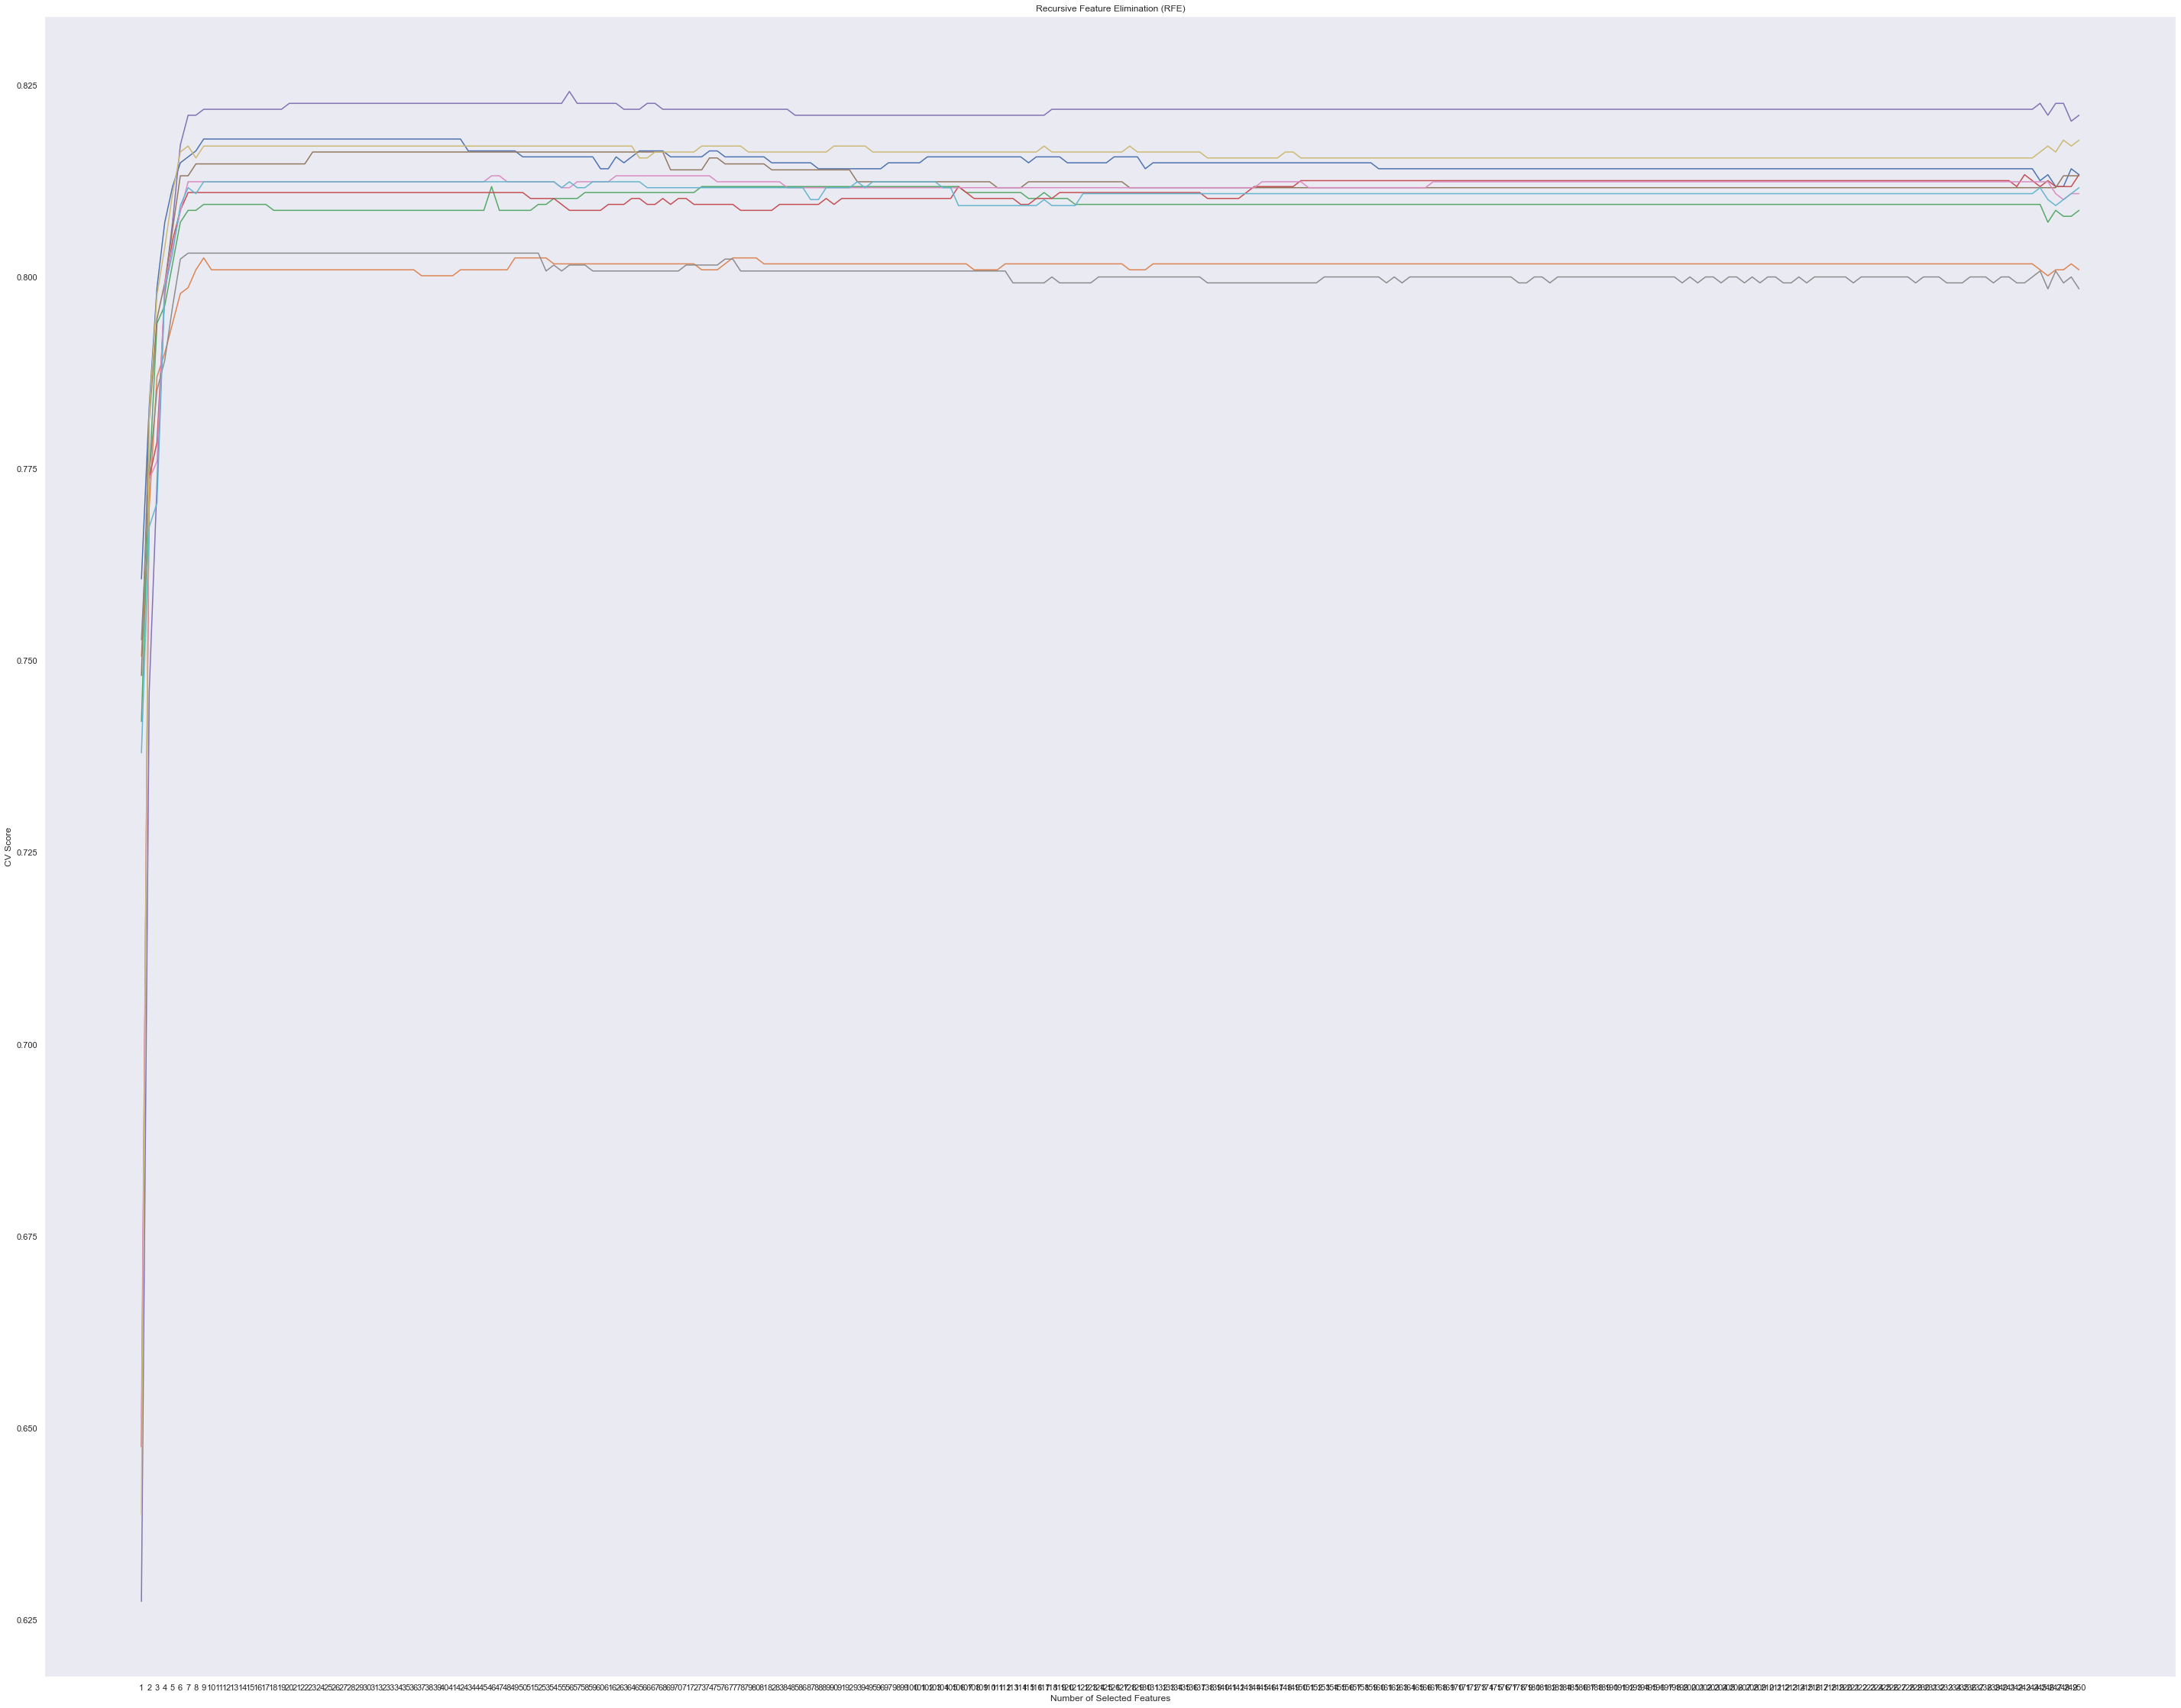

The optimal number of features: 46


In [ ]:
plt.figure(figsize=(50, 40))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, df_tr_8[X].shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))



In [ ]:
#all selected features
X_rfe = df_tr_8[X].iloc[:, rfecv.support_]
X_rfe

,patient_state_ID,patient_state_OR,patient_state_CO,patient_state_MN,patient_state_AL,patient_state_NV,patient_state_WY,patient_state_NJ,breast_cancer_diagnosis_code_1749,breast_cancer_diagnosis_code_1744,...,metastatic_cancer_diagnosis_code_C784,metastatic_cancer_diagnosis_code_C774,metastatic_cancer_diagnosis_code_C7911,metastatic_cancer_diagnosis_code_C775,metastatic_cancer_diagnosis_code_C7960,metastatic_cancer_diagnosis_code_C7901,metastatic_cancer_diagnosis_code_C7839,metastatic_cancer_diagnosis_code_C7971,metastatic_cancer_diagnosis_code_C7830,age_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12904,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Compare dimensions before and after RFE

print("\"X\" dimension: {}".format(df_tr_8[X].shape))
#print("\"X\" column list:", df_tr_8[X].columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
#print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (12905, 250)
"X_rfe" dimension: (12905, 46)


## ML models

In [ ]:
# Build some ML models

X_train, X_test, X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(df_tr_8[X],
                                                                             X_rfe,
                                                                             df_tr_8[Y],
                                                                             train_size=0.8,
                                                                             stratify=df_tr_8[Y],
                                                                             random_state=10)
print("Train size: {}".format(len(y_train)))
print("Test size: {}".format(len(y_test)))

Train size: 10324
Test size: 2581


In [ ]:
random_state  = 13

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state, max_iter=5000),
              SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(),
              SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state, min_samples_split=50,min_samples_leaf=10),
              AdaBoostClassifier(random_state=random_state),
              MLPClassifier(random_state=random_state, max_iter=2000,hidden_layer_sizes=(100,),activation='tanh')]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state),
                  MLPClassifier(random_state=random_state, max_iter=1000)]
clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    clf.fit(X_train, y_train)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    clf_rfe.fit(X_rfe_train, y_train)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")



Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Model training using feature-selected data: done!


In [ ]:
# Check the accuracy between models after RFE

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_rfe_test)
    acc_rfe.append(accuracy_score(y_test, y_rfe_pred))

acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},
                       index=clf_keys)
acc_all

/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

,Original dataset,Feature-selected dataset
Logistic Regression,0.809764,0.810926
Support Vector Machine,0.802402,0.810539
Naive Bayes,0.714839,0.807439
k-Nearest Neighbors,0.660597,0.807826
Stochastic Gradient Descent,0.704766,0.810539
Decision Tree,0.793878,0.808214
AdaBoost,0.809764,0.810151
Multi-layer Perceptron,0.809764,0.809764


Accuracy
Original dataset            0.763222
Feature-selected dataset    0.809425


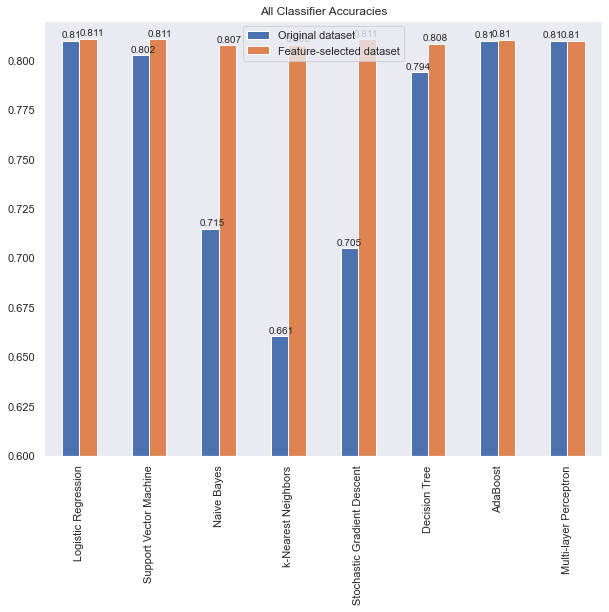

In [ ]:
# Bar plot to observe

print("Accuracy\n" + acc_all.mean().to_string())

ax = acc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.6, 0.82))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

## Model evaluation

In [ ]:
scoring = ["accuracy", "roc_auc"]
random_state=10

scores = []
# Original dataset
print("Cross-validation on original data: started!")
for clf_name, clf in clfs.items():
    score = pd.DataFrame(cross_validate(clf, df_tr_8[X], df_tr_8[Y], cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name, "cross-validation: done!")
cv_scores = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys)), clf_keys)))
print("Cross-validation on original data: done!\n")

scores = []
# Feature-selected dataset
print("Cross-validation on feature-selected data: started!")
for clf_name, clf in clfs_rfe.items():
    score = pd.DataFrame(cross_validate(clf, X_rfe, df_tr_8[Y], cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name, "cross-validation: done!")
cv_scores_rfe = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys)), clf_keys)))
print("Cross-validation on feature-selected data: done!")

Cross-validation on original data: started!
Logistic Regression cross-validation: done!
Support Vector Machine cross-validation: done!
Naive Bayes cross-validation: done!


/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

k-Nearest Neighbors cross-validation: done!
Stochastic Gradient Descent cross-validation: done!
Decision Tree cross-validation: done!
AdaBoost cross-validation: done!
Multi-layer Perceptron cross-validation: done!
Cross-validation on original data: done!

Cross-validation on feature-selected data: started!
Logistic Regression cross-validation: done!
Support Vector Machine cross-validation: done!
Naive Bayes cross-validation: done!


/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

k-Nearest Neighbors cross-validation: done!
Stochastic Gradient Descent cross-validation: done!
Decision Tree cross-validation: done!
AdaBoost cross-validation: done!
Multi-layer Perceptron cross-validation: done!
Cross-validation on feature-selected data: done!


Cross-validation accuracy
Original data            0.735689
Feature-selected data    0.800613


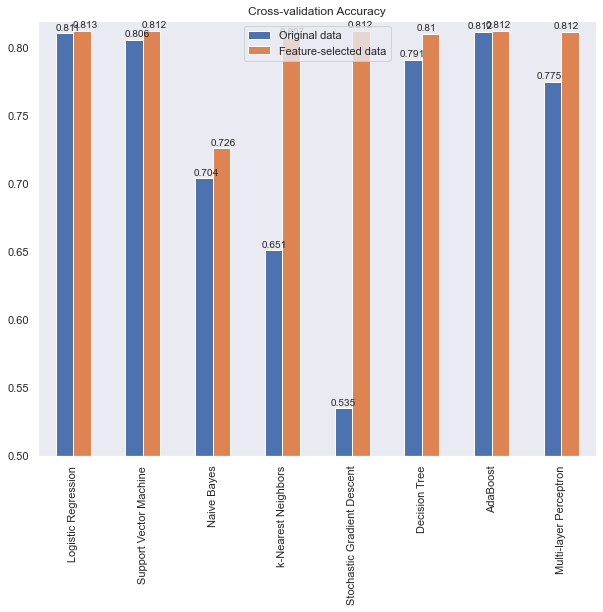

In [ ]:
# Accuracy
cv_acc_all = pd.concat([cv_scores.loc["test_accuracy"].rename("Original data"), cv_scores_rfe.loc["test_accuracy"].rename("Feature-selected data")],
                       axis=1)

print("Cross-validation accuracy\n" + cv_acc_all.mean().to_string())
ax = cv_acc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0.5, 0.82))
plt.title("Cross-validation Accuracy")
plt.grid()
plt.legend()
plt.show()


Cross-validation ROC AUC score
Original data            0.750455
Feature-selected data    0.778582


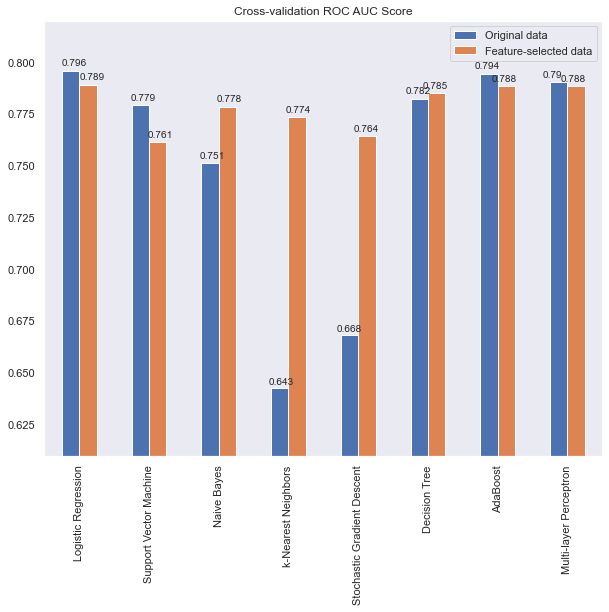

In [ ]:
# ROC AUC
cv_roc_auc_all = pd.concat([cv_scores.loc["test_roc_auc"].rename("Original data"), cv_scores_rfe.loc["test_roc_auc"].rename("Feature-selected data")],
                           axis=1)

print("Cross-validation ROC AUC score\n" + cv_roc_auc_all.mean().to_string())
ax = cv_roc_auc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0.61, 0.82))
plt.title("Cross-validation ROC AUC Score")
plt.grid()
plt.legend()
plt.show()

Cross-validation fit time
Original data            10.737300
Feature-selected data     0.775254


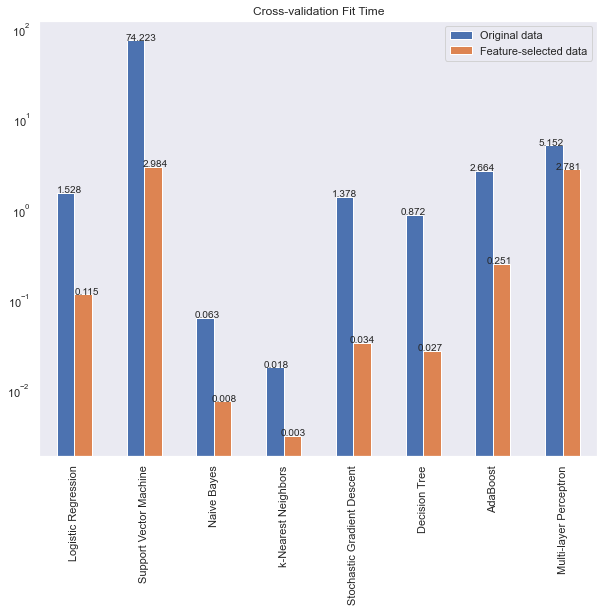

In [ ]:
# Fit time
cv_fit_time_all = pd.concat([cv_scores.loc["fit_time"].rename("Original data"), cv_scores_rfe.loc["fit_time"].rename("Feature-selected data")],
                           axis=1)

print("Cross-validation fit time\n" + cv_fit_time_all.mean().to_string())
ax = cv_fit_time_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Cross-validation Fit Time")
plt.grid()
plt.legend()
plt.show()


## Feature importance

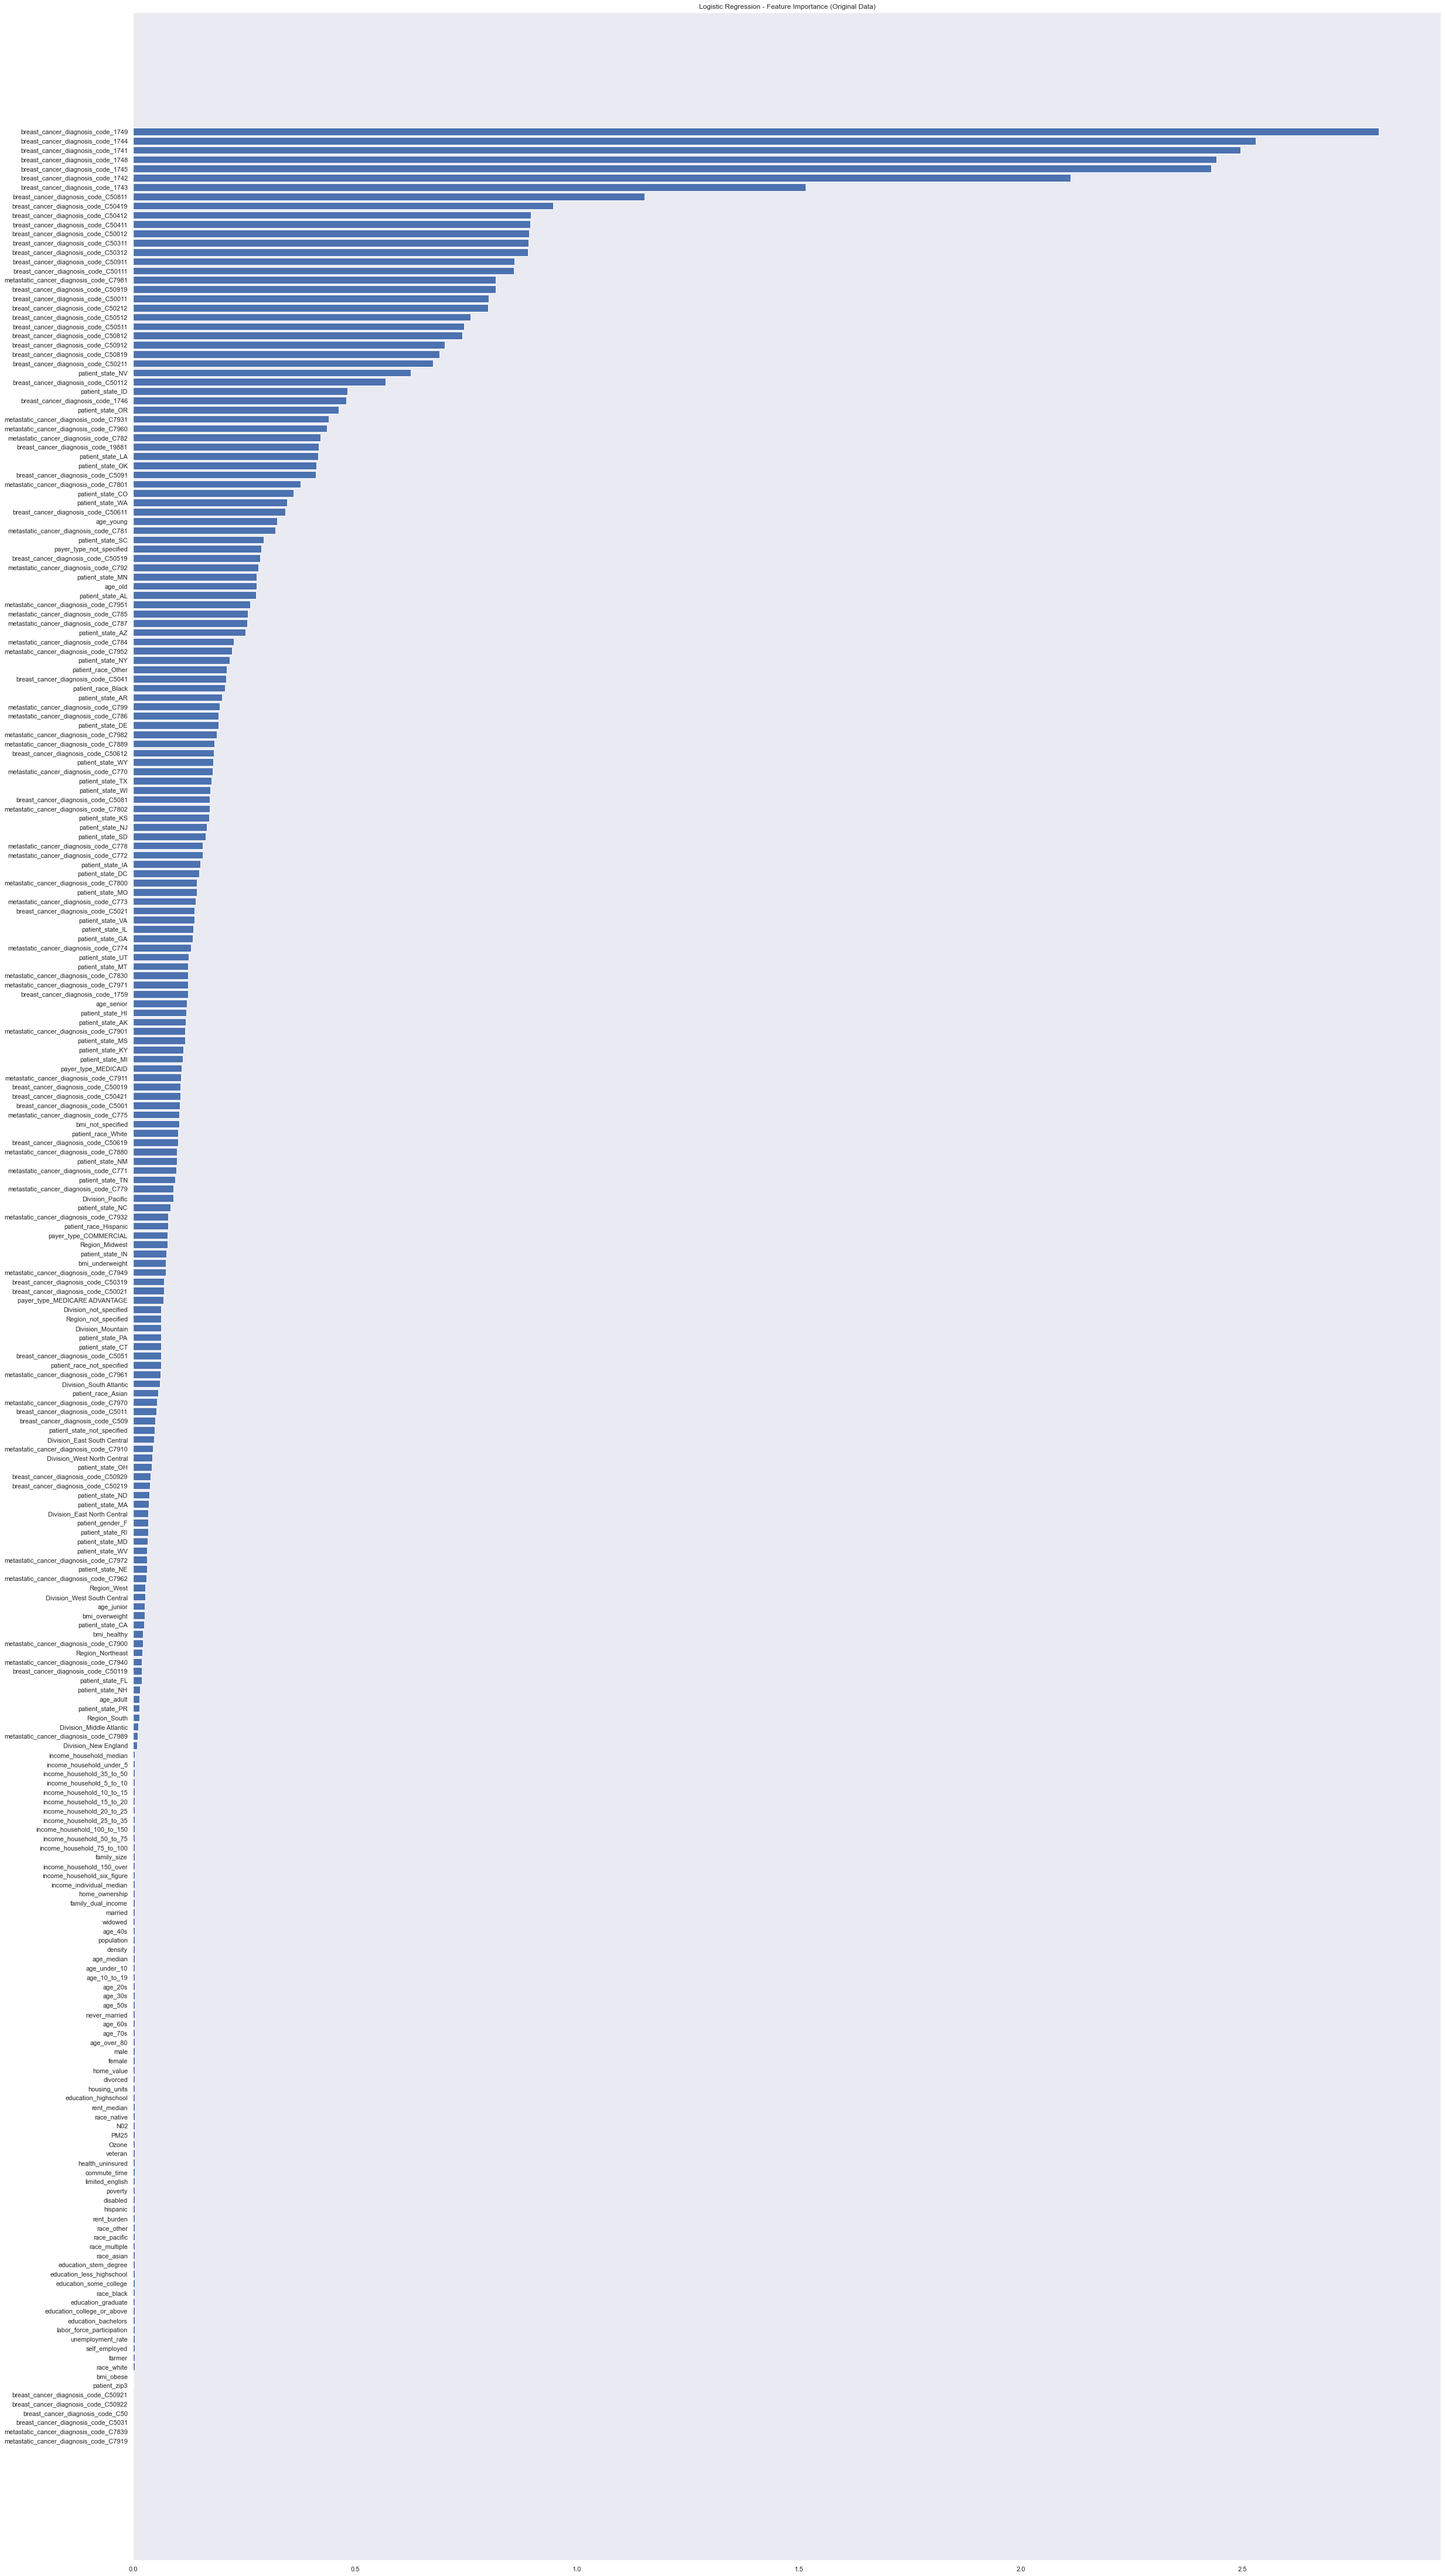

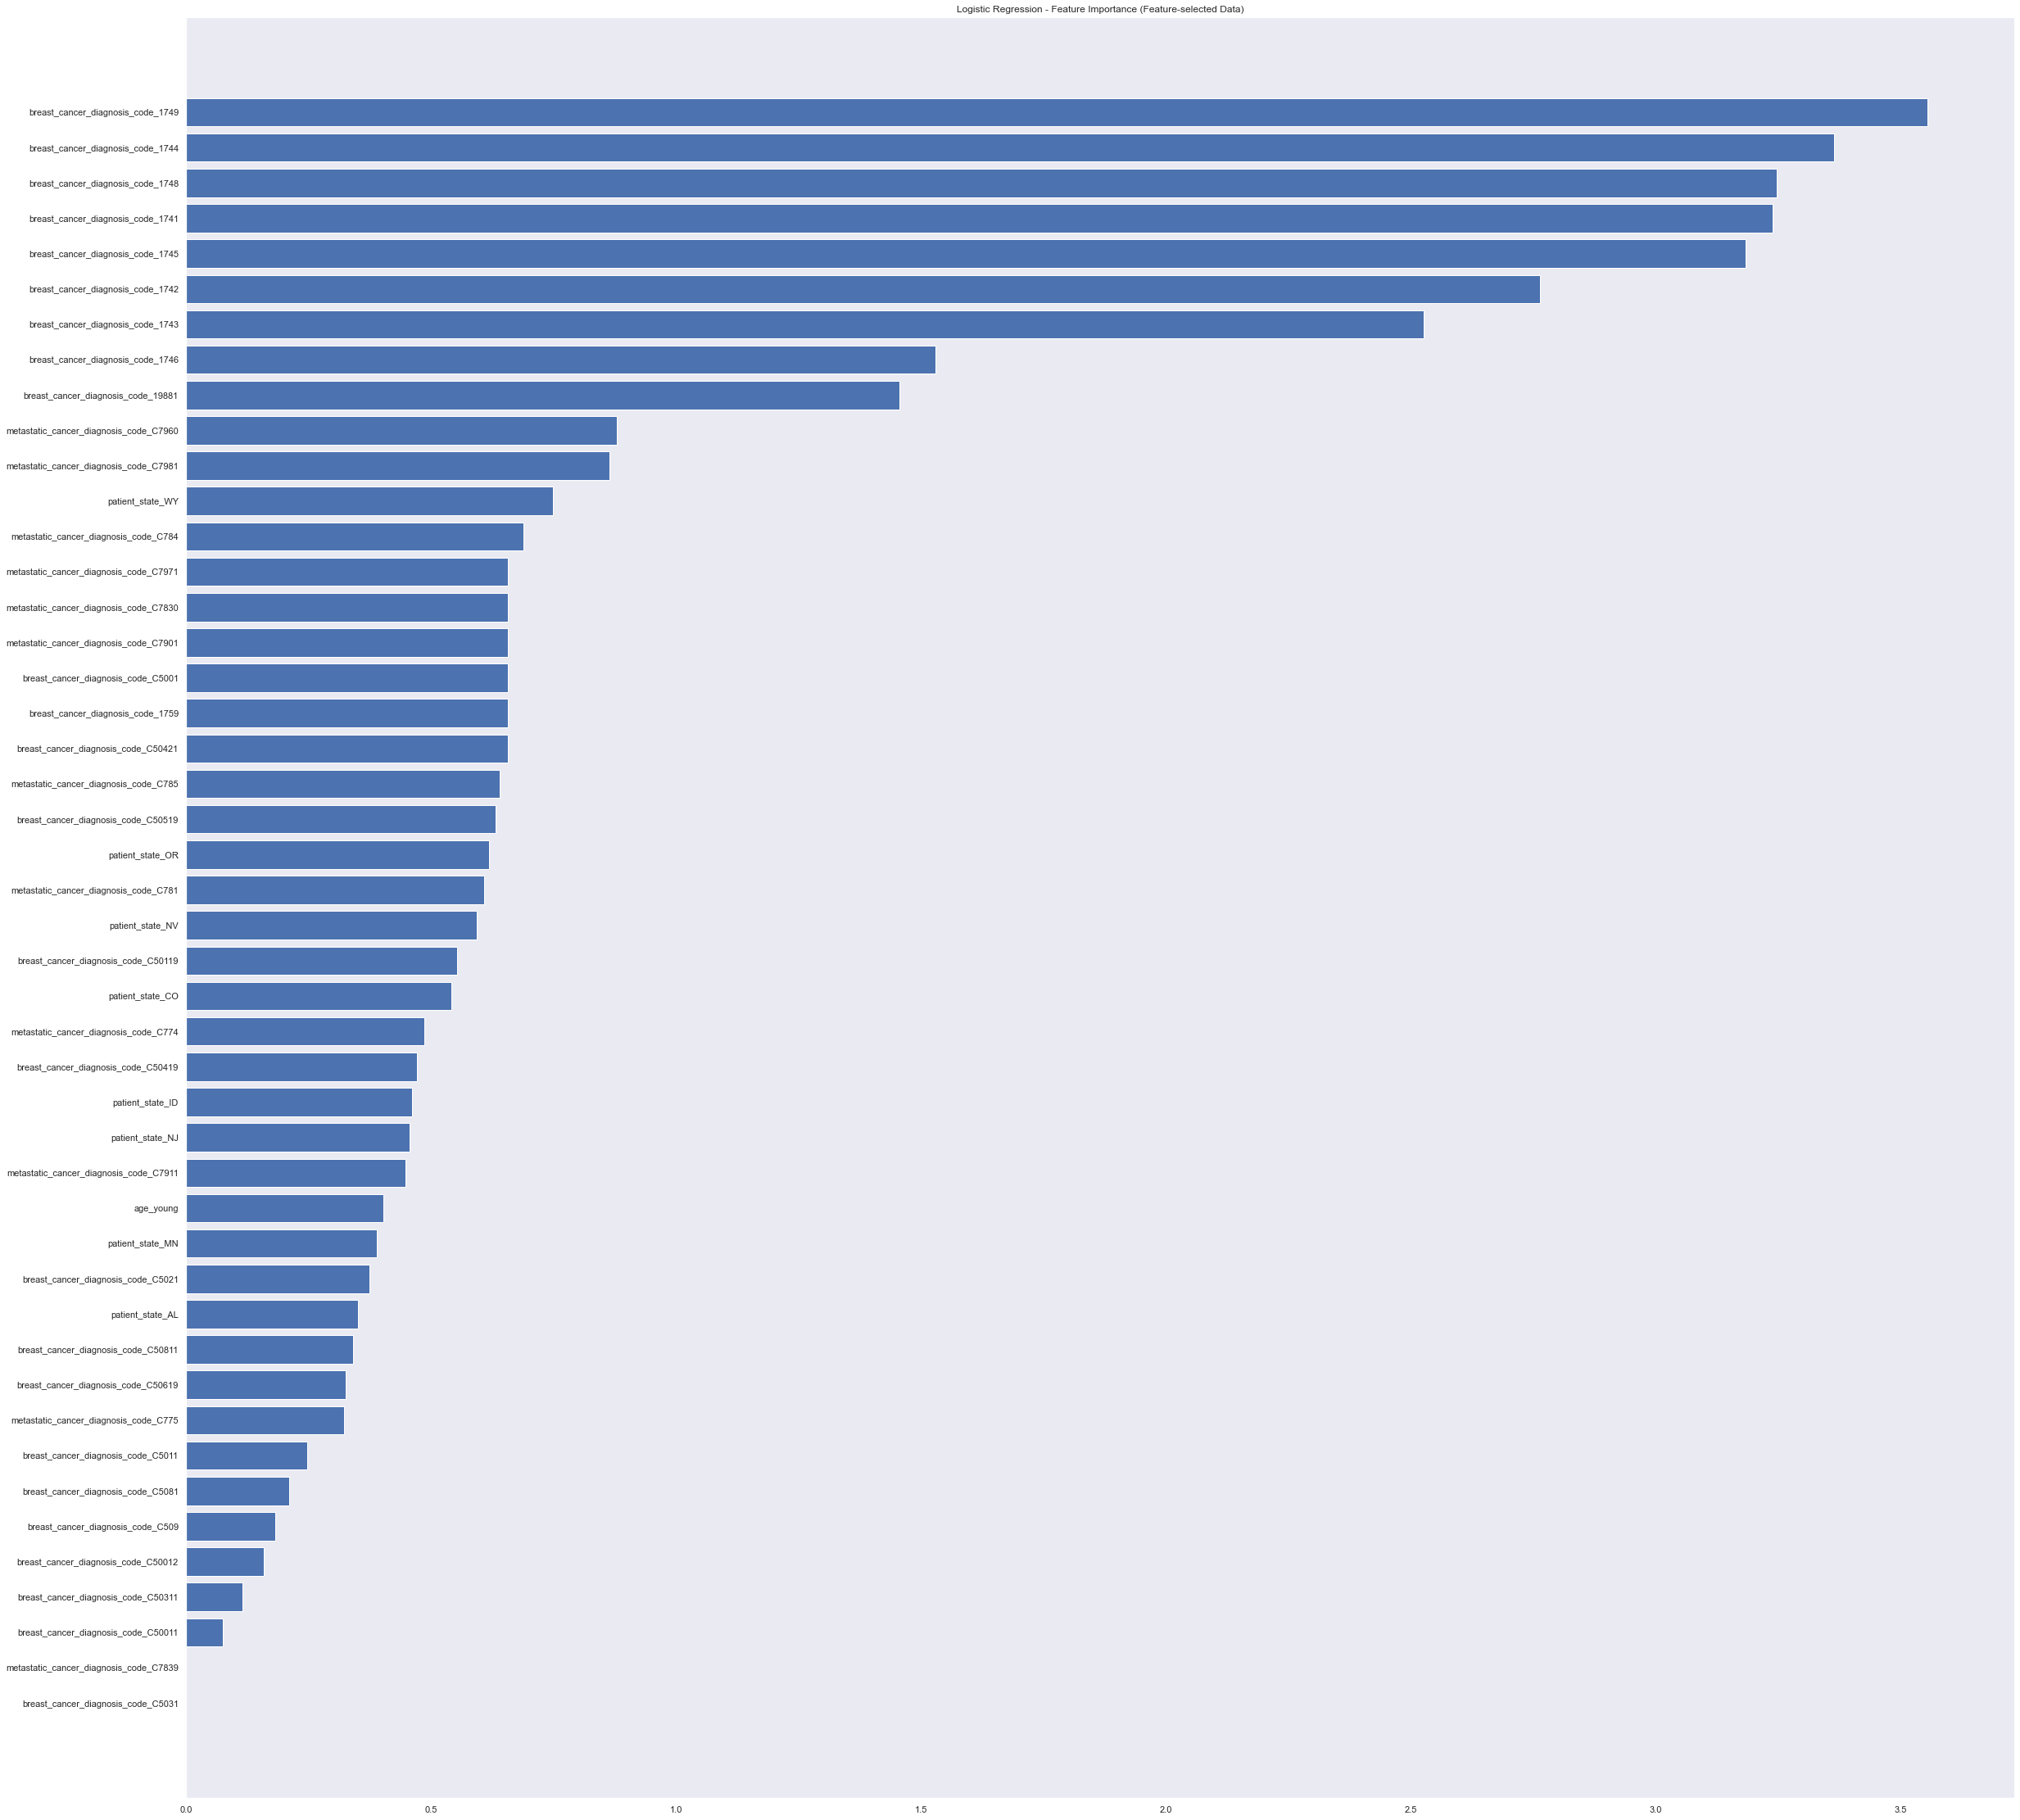

In [ ]:

importance = abs(clfs["Logistic Regression"].coef_[0])
plt.figure(figsize=(40,80))
plt.barh(df_tr_8[X].columns.values[importance.argsort()], importance[importance.argsort()])
plt.title("Logistic Regression - Feature Importance (Original Data)")
plt.grid()
plt.show()

importance_rfe = abs(clfs_rfe["Logistic Regression"].coef_[0])
plt.figure(figsize=(40,40))
plt.barh(X_rfe.columns.values[importance_rfe.argsort()], importance_rfe[importance_rfe.argsort()])
plt.title("Logistic Regression - Feature Importance (Feature-selected Data)")
plt.grid()
plt.show()


## Submission files

In [ ]:
random_state=10
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state, max_iter=5000),
                  SVC(kernel="linear",random_state=random_state,probability=True),
                  GaussianNB(),
                  KNeighborsClassifier(),
                  SGDClassifier(random_state=random_state,loss='log'),
                  DecisionTreeClassifier(random_state=random_state),
                  AdaBoostClassifier(random_state=random_state),
                  MLPClassifier(random_state=random_state, max_iter=1000)]
clfs_rfe_sub = dict(zip(clf_rfe_keys, clf_rfe_values))

In [ ]:
clfs_rfe_sub['Logistic Regression'].fit(X_rfe, df_tr_8[Y])
score_lr = clfs_rfe_sub['Logistic Regression'].score(X_rfe,df_tr_8[Y])
auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub['Logistic Regression'].predict_proba(X_rfe)[:,1])
print('score = ', score_lr)
print('auc_score=', auc_score_lr)

score =  0.8125532739248353
auc_score= 0.7959614040209266


In [ ]:
## loop for every model

for element in clf_keys:
    clfs_rfe_sub[element].fit(X_rfe, df_tr_8[Y])
    score_lr = clfs_rfe_sub[element].score(X_rfe,df_tr_8[Y])
    auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub[element].predict_proba(X_rfe)[:,1])

    preds=clfs_rfe_sub[element].predict_proba(df_ts_8[X_rfe.columns.values.tolist()])[:,1]
    df_submission = pd.DataFrame(
    {
    'patient_id':df_ts['patient_id'],
    'DiagPeriodL90D':preds
    })
    df_submission.to_csv('Datasets/submission_'+element+'.csv',index=None)

    print('model:',element,'ongoing')
    print('score = ', score_lr)
    print('auc_score=', auc_score_lr)

model: Logistic Regression ongoing
score =  0.8125532739248353
auc_score= 0.7959614040209266
model: Support Vector Machine ongoing
score =  0.8122433165439752
auc_score= 0.7732864071578742
model: Naive Bayes ongoing
score =  0.8068190623789229
auc_score= 0.7810012752652321


/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


model: k-Nearest Neighbors ongoing
score =  0.6826036419992251
auc_score= 0.7755424742706276
model: Stochastic Gradient Descent ongoing
score =  0.8124757845796203
auc_score= 0.7898480180893044
model: Decision Tree ongoing
score =  0.8155753583882216
auc_score= 0.8035043161838329
model: AdaBoost ongoing
score =  0.8130956993413405
auc_score= 0.7942549301292935
model: Multi-layer Perceptron ongoing
score =  0.8152654010073614
auc_score= 0.8013910378047


In [ ]:
## loop for every model

for element in clf_keys:
    clfs_rfe_sub[element].fit(df_tr_8[X], df_tr_8[Y])
    score_lr = clfs_rfe_sub[element].score(df_tr_8[X],df_tr_8[Y])
    auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub[element].predict_proba(df_tr_8[X])[:,1])

    preds=clfs_rfe_sub[element].predict_proba(df_ts_8[X])[:,1]
    df_submission = pd.DataFrame(
    {
    'patient_id':df_ts['patient_id'],
    'DiagPeriodL90D':preds
    })
    df_submission.to_csv('Datasets/submission_'+element+'_all.csv',index=None)

    print('model:',element,'ongoing')
    print('score = ', score_lr)
    print('auc_score=', auc_score_lr)

model: Logistic Regression ongoing
score =  0.8111584657109647
auc_score= 0.8113719984532928
model: Support Vector Machine ongoing
score =  0.8068190623789229
auc_score= 0.7839645640154977
model: Naive Bayes ongoing
score =  0.71762882603642
auc_score= 0.7676419628841482


/Users/vanotole/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


model: k-Nearest Neighbors ongoing
score =  0.7766757070902751
auc_score= 0.83638796487643
model: Stochastic Gradient Descent ongoing
score =  0.40131731886865557
auc_score= 0.7088302130307523
model: Decision Tree ongoing
score =  0.9914761720263464
auc_score= 0.9998419618598386
model: AdaBoost ongoing
score =  0.8124757845796203
auc_score= 0.809709966786767
model: Multi-layer Perceptron ongoing
score =  0.81201084850833
auc_score= 0.8140083276356121


In [ ]:
random_state=10
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state, max_iter=5000),
                  SVC(kernel="linear",random_state=random_state,probability=True),
                  GaussianNB(),
                  KNeighborsClassifier(),
                  SGDClassifier(random_state=random_state,loss='log'),
                  DecisionTreeClassifier(random_state=random_state),
                  AdaBoostClassifier(random_state=random_state),
                  MLPClassifier(random_state=random_state, max_iter=1000,hidden_layer_sizes=(100,),activation='tanh')]
clfs_rfe_sub = dict(zip(clf_rfe_keys, clf_rfe_values))

for element in ['Multi-layer Perceptron']:
    clfs_rfe_sub[element].fit(df_tr_8[X], df_tr_8[Y])
    score_lr = clfs_rfe_sub[element].score(df_tr_8[X],df_tr_8[Y])
    auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub[element].predict_proba(df_tr_8[X])[:,1])

    preds=clfs_rfe_sub[element].predict_proba(df_ts_8[X])[:,1]
    df_submission = pd.DataFrame(
    {
    'patient_id':df_ts['patient_id'],
    'DiagPeriodL90D':preds
    })
    df_submission.to_csv('Datasets/submission_'+element+'_all_2.csv',index=None)

    print('model:',element,'ongoing')
    print('score = ', score_lr)
    print('auc_score=', auc_score_lr)

model: Multi-layer Perceptron ongoing
score =  0.8134056567222007
auc_score= 0.8222840435638796


In [ ]:
random_state=230
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state, max_iter=5000),
                  SVC(kernel="linear",random_state=random_state,probability=True),
                  GaussianNB(),
                  KNeighborsClassifier(),
                  SGDClassifier(random_state=random_state,loss='log'),
                  DecisionTreeClassifier(random_state=random_state),
                  AdaBoostClassifier(random_state=random_state),
                  MLPClassifier(random_state=random_state, max_iter=5000,hidden_layer_sizes=(25,),activation='tanh',
                               solver='adam',
                               learning_rate='adaptive',
                               alpha=0.05)]
clfs_rfe_sub = dict(zip(clf_rfe_keys, clf_rfe_values))

for element in ['Multi-layer Perceptron']:
    clfs_rfe_sub[element].fit(df_tr_8[X], df_tr_8[Y])
    score_lr = clfs_rfe_sub[element].score(df_tr_8[X],df_tr_8[Y])
    auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub[element].predict_proba(df_tr_8[X])[:,1])

    preds=clfs_rfe_sub[element].predict_proba(df_ts_8[X])[:,1]
    df_submission = pd.DataFrame(
    {
    'patient_id':df_ts['patient_id'],
    'DiagPeriodL90D':preds
    })
    #df_submission.to_csv('Datasets/submission_'+element+'_all_3.csv',index=None)

    print('model:',element,'ongoing')
    print('score = ', score_lr)
    print('auc_score=', auc_score_lr)

model: Multi-layer Perceptron ongoing
score =  0.811778380472685
auc_score= 0.8137691641891183


In [ ]:
layers = np.arange(10,100,5)
for lay in layers:
    random_state=150
    clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                    "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
    clf_rfe_values = [LogisticRegression(random_state=random_state, max_iter=5000),
                      SVC(kernel="linear",random_state=random_state,probability=True),
                      GaussianNB(),
                      KNeighborsClassifier(),
                      SGDClassifier(random_state=random_state,loss='log'),
                      DecisionTreeClassifier(random_state=random_state),
                      AdaBoostClassifier(random_state=random_state),
                      MLPClassifier(random_state=random_state, max_iter=1000,hidden_layer_sizes=(lay,),activation='tanh')]
    clfs_rfe_sub = dict(zip(clf_rfe_keys, clf_rfe_values))

    for element in ['Multi-layer Perceptron']:
        clfs_rfe_sub[element].fit(df_tr_8[X], df_tr_8[Y])
        score_lr = clfs_rfe_sub[element].score(df_tr_8[X],df_tr_8[Y])
        auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub[element].predict_proba(df_tr_8[X])[:,1])

        preds=clfs_rfe_sub[element].predict_proba(df_ts_8[X])[:,1]
        df_submission = pd.DataFrame(
        {
        'patient_id':df_ts['patient_id'],
        'DiagPeriodL90D':preds
        })
        #df_submission.to_csv('Datasets/submission_'+element+'_all_3.csv',index=None)

        print('model:',element,'number',lay,'ongoing')
        print('score = ', score_lr)
        print('auc_score=', auc_score_lr)

model: Multi-layer Perceptron number 10 ongoing
score =  0.8122433165439752
auc_score= 0.8151907008068998
model: Multi-layer Perceptron number 15 ongoing
score =  0.8125532739248353
auc_score= 0.8157947744854765
model: Multi-layer Perceptron number 20 ongoing
score =  0.8128632313056955
auc_score= 0.8191139083294281
model: Multi-layer Perceptron number 25 ongoing
score =  0.8144905075552111
auc_score= 0.8335194887671669
model: Multi-layer Perceptron number 30 ongoing
score =  0.8120883378535452
auc_score= 0.8217883802339011
model: Multi-layer Perceptron number 35 ongoing
score =  0.8122433165439752
auc_score= 0.8303149111283536
model: Multi-layer Perceptron number 40 ongoing
score =  0.8137156141030608
auc_score= 0.8329145700333156
model: Multi-layer Perceptron number 45 ongoing
score =  0.8126307632700503
auc_score= 0.8124556794116367
model: Multi-layer Perceptron number 50 ongoing
score =  0.8134831460674158
auc_score= 0.8250049166852322
model: Multi-layer Perceptron number 55 ongoin

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state, max_iter=5000),
                  SVC(kernel="linear",random_state=random_state,probability=True),
                  GaussianNB(),
                  KNeighborsClassifier(),
                  SGDClassifier(random_state=random_state,loss='log'),
                  DecisionTreeClassifier(random_state=random_state),
                  AdaBoostClassifier(random_state=random_state),
                  MLPClassifier(max_iter=2000)]
clfs_rfe_sub = dict(zip(clf_rfe_keys, clf_rfe_values))

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf_grid = GridSearchCV(clfs_rfe_sub['Multi-layer Perceptron'], parameter_space, n_jobs=-1, cv=3)
clf_grid.fit(df_tr_8[X], df_tr_8[Y])

#clfs_rfe_sub['Multi-layer Perceptron'].fit(df_tr_8[X], df_tr_8[Y])

#score_lr = clfs_rfe_sub['Multi-layer Perceptron'].score(df_tr_8[X],df_tr_8[Y])
#auc_score_lr = roc_auc_score(df_tr_8[Y],clfs_rfe_sub['Multi-layer Perceptron'].predict_proba(df_tr_8[X])[:,1])

#preds=clfs_rfe_sub['Multi-layer Perceptron'].predict_proba(df_ts_8[X])[:,1]
#df_submission = pd.DataFrame(
#{
#'patient_id':df_ts['patient_id'],
#'DiagPeriodL90D':preds
#})
#df_submission.to_csv('Datasets/submission_'+element+'_all_3.csv',index=None)

#print('model:',element,'ongoing')
#print('score = ', score_lr)
#print('auc_score=', auc_score_lr)




GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf_grid.best_params_)

# All results
means = clf_grid.cv_results_['mean_test_score']
stds = clf_grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.625 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.798 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.625 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.806 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.625 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.785 (+/-0.043) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver'